In [1]:
#Titanic Dataset Code to prepare machine Learning Model

In [1]:
#Importing all the libraries

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20181016025455-0000


In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from matplotlib import pyplot as plt

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.svm import SVC

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [14]:
# The code was removed by Watson Studio for sharing.

In [17]:
# The code was removed by Watson Studio for sharing.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df=df_data_2 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [20]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
#Based on Countplot we can see Women Survived More compare to Men

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


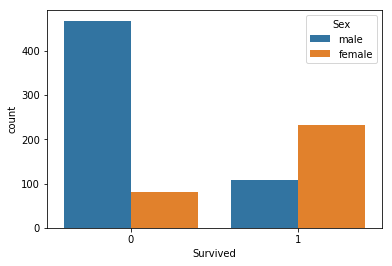

In [22]:
sns.countplot('Survived',hue='Sex',data=df)

In [ ]:
#People belongs to Pclass 1 Survived more than pclass 2 and 3, might be higher class people Evacuated First

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


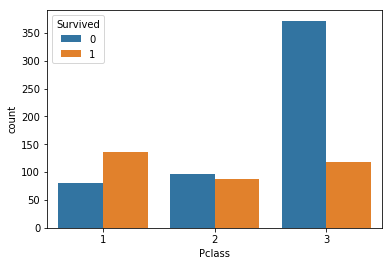

In [23]:
sns.countplot('Pclass',hue='Survived',data=df)

In [ ]:
#Checking for Null Columns

In [24]:
pernull=df.isnull().sum()/df.isnull().count()

In [25]:
pernull

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
#Checking % of Men and Women Survived, we got to know Men survived more compare to Women, men=18%, Women =74% Survival rate

In [26]:
df[df['Sex']=='male'].Survived.sum()/df[df['Sex']=='male'].Survived.count()

0.18890814558058924

In [27]:
df[df['Sex']=='female'].Survived.sum()/df[df['Sex']=='female'].Survived.count()

0.7420382165605095

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


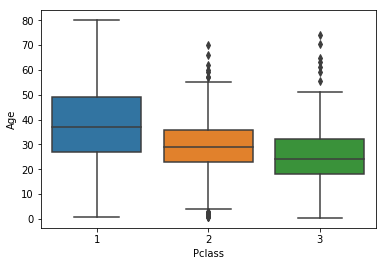

In [28]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [ ]:
#Age Column is having Null Values so adding median of every Pclass age to null places in Age Column

In [29]:
def fun(val):
    age=val[0]
    pclass=val[1]
    if pd.isnull(val[0]):
        if pclass==1:
            return 37
        if pclass ==2:
            return 29
        if pclass==3:
            return 24
    else:
        return age       

In [30]:
df['age']=df[['Age','Pclass']].apply(fun,axis=1)

In [31]:
df['age'].isnull().sum()

0

In [32]:
df['age']=df['age'].astype(int)

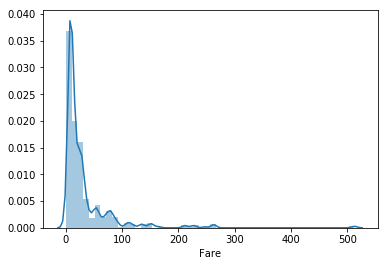

In [33]:
sns.distplot(df['Fare'],bins=50)

In [34]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#Inserting highest value in Embarked column('S') to null places in Embarked

In [35]:
df['Embarked']=df['Embarked'].fillna('S')

In [36]:
df['Embarked'].isnull().sum()

0

In [ ]:
#Concatinating Sibsp and Parch Column and creating Relative Column

In [37]:
df['relative']=df['SibSp']+df['Parch']

In [38]:
df['relative']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: relative, Length: 891, dtype: int64

In [39]:
df.loc[df['relative']>0,'non-relative']=0
df.loc[df['relative']==0, 'non-relative']=1

In [40]:
df['non-relative']=df['non-relative'].astype(int)

In [41]:
df['Fare']=df['Fare'].astype(int)

In [ ]:
#Using Label Encoder to convert Categorial to Numerical Values

In [42]:
Labelenc=LabelEncoder()

In [43]:
df['Sex']=Labelenc.fit_transform(df['Sex'])

In [44]:
df['Embarked']=Labelenc.fit_transform(df['Embarked'])


In [ ]:
#Deleting Columns

In [45]:
df.drop(['Age','Cabin','Name','Ticket','SibSp','Parch'],axis=1,inplace=True)

In [ ]:
#Final dataframe

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null int64
Fare            891 non-null int64
Embarked        891 non-null int64
age             891 non-null int64
relative        891 non-null int64
non-relative    891 non-null int64
dtypes: int64(9)
memory usage: 62.7 KB


In [47]:
x=df.drop('Survived',axis=1)

In [48]:
y=df['Survived']

In [49]:
x_trn,x_tst,y_trn,y_tst=train_test_split(x,y,random_state=10,test_size=0.2)

In [50]:
randomclf=RandomForestClassifier(n_estimators=25,criterion='gini',max_depth=7,random_state=100)

In [51]:
randomclf.fit(x_trn,y_trn)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [52]:
randompred=randomclf.predict(x_tst)

In [53]:
decisiontreeclf=DecisionTreeClassifier(max_depth=7,criterion='entropy',random_state=100,max_features=3)

In [54]:
decisiontreeclf.fit(x_trn,y_trn)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [55]:
decisiontreepred=decisiontreeclf.predict(x_tst)

In [56]:
gausianclf=GaussianNB()

In [57]:
gausianclf.fit(x_trn,y_trn)

GaussianNB(priors=None)

In [58]:
gausianpred=gausianclf.predict(x_tst)

In [59]:
svmclf=SVC(kernel='linear',C=1,gamma=0.1).fit(x_trn,y_trn)

In [60]:
svmpred=svmclf.predict(x_tst)

In [61]:
logisticclf=LogisticRegression().fit(x_trn,y_trn)

In [62]:
logisticpred=logisticclf.predict(x_tst)

In [63]:
confusion_matrix(randompred,y_tst)

array([[107,  13],
       [ 10,  49]])

In [64]:
classification_report(randompred,y_tst)

'             precision    recall  f1-score   support\n\n          0       0.91      0.89      0.90       120\n          1       0.79      0.83      0.81        59\n\navg / total       0.87      0.87      0.87       179\n'

In [65]:
accuracy_score(randompred,y_tst)

0.87150837988826813

In [66]:
confusion_matrix(decisiontreepred,y_tst)

array([[103,   9],
       [ 14,  53]])

In [67]:
classification_report(decisiontreepred,y_tst)

'             precision    recall  f1-score   support\n\n          0       0.88      0.92      0.90       112\n          1       0.85      0.79      0.82        67\n\navg / total       0.87      0.87      0.87       179\n'

In [68]:
accuracy_score(decisiontreepred,y_tst)

0.87150837988826813

In [69]:
classification_report(gausianpred,y_tst)

'             precision    recall  f1-score   support\n\n          0       0.85      0.88      0.87       114\n          1       0.77      0.74      0.76        65\n\navg / total       0.83      0.83      0.83       179\n'

In [70]:
confusion_matrix(gausianpred,y_tst)

array([[100,  14],
       [ 17,  48]])

In [71]:
accuracy_score(gausianpred,y_tst)

0.82681564245810057

In [72]:
classification_report(svmpred,y_tst)

'             precision    recall  f1-score   support\n\n          0       0.89      0.84      0.86       124\n          1       0.68      0.76      0.72        55\n\navg / total       0.82      0.82      0.82       179\n'

In [73]:
confusion_matrix(svmpred,y_tst)

array([[104,  20],
       [ 13,  42]])

In [74]:
accuracy_score(svmpred,y_tst)

0.81564245810055869

In [75]:
confusion_matrix(logisticpred,y_tst)

array([[103,  21],
       [ 14,  41]])

In [76]:
classification_report(logisticpred,y_tst)

'             precision    recall  f1-score   support\n\n          0       0.88      0.83      0.85       124\n          1       0.66      0.75      0.70        55\n\navg / total       0.81      0.80      0.81       179\n'

In [77]:
accuracy_score(logisticpred,y_tst)

0.8044692737430168

In [83]:
{
    "url": "https://ibm-watson-ml.mybluemix.net",
    "username": "e2fadbfc-2a51-48f0-8550-b9c434c26cf7",
    "password": "cea9c1dc-2ff5-4a6e-8e07-746498e3c630",
    "instance_id": "5fd63b85-d45d-4bee-bc58-9a16d87eee41"
}



{'instance_id': '5fd63b85-d45d-4bee-bc58-9a16d87eee41',
 'password': 'cea9c1dc-2ff5-4a6e-8e07-746498e3c630',
 'url': 'https://ibm-watson-ml.mybluemix.net',
 'username': 'e2fadbfc-2a51-48f0-8550-b9c434c26cf7'}

In [84]:
# The code was removed by Watson Studio for sharing.

[Row(PassengerId=1, Survived=0, Pclass=3, Name='Braund, Mr. Owen Harris', Sex='male', Age=22.0, SibSp=1, Parch=0, Ticket='A/5 21171', Fare=7.25, Cabin=None, Embarked='S'),
 Row(PassengerId=2, Survived=1, Pclass=1, Name='Cumings, Mrs. John Bradley (Florence Briggs Thayer)', Sex='female', Age=38.0, SibSp=1, Parch=0, Ticket='PC 17599', Fare=71.2833, Cabin='C85', Embarked='C'),
 Row(PassengerId=3, Survived=1, Pclass=3, Name='Heikkinen, Miss. Laina', Sex='female', Age=26.0, SibSp=0, Parch=0, Ticket='STON/O2. 3101282', Fare=7.925, Cabin=None, Embarked='S'),
 Row(PassengerId=4, Survived=1, Pclass=1, Name='Futrelle, Mrs. Jacques Heath (Lily May Peel)', Sex='female', Age=35.0, SibSp=1, Parch=0, Ticket='113803', Fare=53.1, Cabin='C123', Embarked='S'),
 Row(PassengerId=5, Survived=0, Pclass=3, Name='Allen, Mr. William Henry', Sex='male', Age=35.0, SibSp=0, Parch=0, Ticket='373450', Fare=8.05, Cabin=None, Embarked='S')]

In [85]:
# The code was removed by Watson Studio for sharing.

In [91]:
{
   "credentials":{
      "tenant_id":"s068-ade10277b64956-05b1d10fv12b",
      "tenant_id_full":"00fd89e6-8cf2-4712-a068-ade10277b649_41f37bf2-1b95-4c65-a156-05b1d10fb12b",
      "cluster_master_url":"https://spark.bluemix.net",
      "instance_id":"00fd89e6-8cf2-4712-a068-ade10277b649",
      "tenant_secret":"c74c37cf-482a-4da4-836e-f32ca26ccbb9",
      "plan":"ibm.SparkService.PayGoPersonal"
   },
   "version":"2.0"
}

{'credentials': {'cluster_master_url': 'https://spark.bluemix.net',
  'instance_id': '00fd89e6-8cf2-4712-a068-ade10277b649',
  'plan': 'ibm.SparkService.PayGoPersonal',
  'tenant_id': 's068-ade10277b64956-05b1d10fv12b',
  'tenant_id_full': '00fd89e6-8cf2-4712-a068-ade10277b649_41f37bf2-1b95-4c65-a156-05b1d10fb12b',
  'tenant_secret': 'c74c37cf-482a-4da4-836e-f32ca26ccbb9'},
 'version': '2.0'}